\chapter{Backgroud Least Squares}

El planteamiento del algoritmo de posicionamiento cooperativo esta apoyado en la técnica númerica de mínimos cuadrados, de forma que la asociación de la terminología y planteamiento pueden facilitar la comprensión de la técnica de posicionamiento propuesta en esta investigación.

El plantemiento de mínimos cuadrados establece un proceso de linearización al modelo no lineal asociado al pseudorango existente entre un receptor GPS y un satélite visible desde su ubicación, con lo cual, una observación GPS obtenida por el receptor puede ser considerada como:


\begin{equation}
\begin{aligned}
P_{obs} &= pseudorango_{modelo} + ruido \\
        &= P(x,y,z,\tau) + \eta
\end{aligned}
\end{equation}

Aplicar la expansión de series de taylor al modelo de pseudorango, alrededor de un punto de operación $(x_o, y_o, z_o, \tau_o)$ e ignorando los términos de orden superior y errores de truncamiento asociados, el modelo de pseudorango sería definido como:

\begin{equation}
\begin{aligned}
P(x,y,z,\tau) &= P(x_o,y_o,z_o,\tau_o) 
                 +(x-x_o){\frac{\partial P}{\partial x}}
                 +(y-y_o){\frac{\partial P}{\partial y}}
                 +(z-z_o){\frac{\partial P}{\partial z}}
                 +(\tau-\tau _o){\frac{\partial P}{\partial \tau}} \\
        &= P(x_o,y_o,z_o,\tau_o) 
                 +{\frac{\partial P}{\partial x}} \Delta x 
                 +{\frac{\partial P}{\partial y}} \Delta y
                 +{\frac{\partial P}{\partial z}} \Delta z 
                 +{\frac{\partial P}{\partial \tau}}\Delta \tau  \\
\end{aligned}
\end{equation}

Al plantear la diferencia (el error) entre los valores observados de distancia y el modelo linearizado de pseudorango, se obtiene una expresión:

\begin{equation}
\begin{aligned}
\Delta P &= (\frac{\partial P}{\partial x}, \frac{\partial P}{\partial y}, \frac{\partial P}{\partial t},\frac{\partial P}{\partial \tau})
            (\Delta x \Delta y \Delta z \Delta \tau)^{T} \\
         &= A*\Delta X 
\end{aligned}
\end{equation}

donde:
\begin{itemize}
\item $ \Delta P = P_{obs} - P(x_o,y_o,z_o,\tau_o)$
\item $A$ Matriz de cosenos directores
\item $ \Delta X = (\Delta x \Delta y \Delta z \Delta \tau)^{T}$
\end{itemize}

In [1]:
from sympy import *
%matplotlib inline
init_printing(use_latex=True)
%run -i ../code/WallasUtils.py
#%run -i ../code/utils.py
%run -i ../code/Wallas_symbolic_utils.py
%run -i ../code/multirover4.py

In [2]:
n_vars = 4
n_sats = 4

Dist, Ad = create_distance_matrix("a", "b", "b")
Aa, Pa, Xa = create_matrix_x_receiver("a", n_sats=n_sats)
Ab, Pb, Xb = create_matrix_x_receiver("b", n_sats=n_sats)

# Planteamiento para posicionamiento autónomo

## El modelo de pseudorango asumido

En cuanto al modelo de pseudorango $\rho^{i}$ considerado para el presente estudio, se considera que el modelo involucra la distancia geométrica hasta el satélite visible y el error de sincronización en el reloj del receptor $\tau_a$, los términos asociados a fenomenos ionosféricos, troposféricos y demás, son agrupados como parte del término de error $\nu_i$.

Como caso concreto, los pseudorangos a cuatro satélites desde el receptor $a$ serán:

In [3]:

rhos   = Matrix(n_sats, 1, lambda i,j:var('\hat{\\rho^{(%d)}}' % (i+1)))
nu     = Matrix(n_sats, 1, lambda i,j:var('\\nu_{%d}'%(i+1) ))

vnames  = ["x", "y", "z", "\\tau"]
x0     = Matrix(Xa.shape[0],1, lambda i,j: var(vnames[i]+"_0"))

#rhos,Pa,nu
Eq(rhos,Pa+nu)

                      ⎡                                 ______________________
                      ⎢                                ╱               2      
                      ⎢\nu_{1} - \tau__{1} + \tauₐ + ╲╱  (-x__{1} + xₐ)  + (-y
                      ⎢                                                       
⎡\hat{\rho__{(1)}}⎤   ⎢                                 ______________________
⎢                 ⎥   ⎢                                ╱               2      
⎢\hat{\rho__{(2)}}⎥   ⎢\nu_{2} - \tau__{2} + \tauₐ + ╲╱  (-x__{2} + xₐ)  + (-y
⎢                 ⎥ = ⎢                                                       
⎢\hat{\rho__{(3)}}⎥   ⎢                                 ______________________
⎢                 ⎥   ⎢                                ╱               2      
⎣\hat{\rho__{(4)}}⎦   ⎢\nu_{3} - \tau__{3} + \tauₐ + ╲╱  (-x__{3} + xₐ)  + (-y
                      ⎢                                                       
                      ⎢                             

Para efectos demostrativos, en esta sección del documento se ha asume que $\nu_{i} = 0$ para los receptores que conforman la pareja en posicionamiento cooperativo. Con posterioridad se estudiará el efecto asociado a variaciones en este término del modelo de pseudorando.

De forma que el modelo de pseudorango simplificado y a considerar, queda definido como:

In [4]:
Pc_a, Pc_b = Pa, Pb
Eq(rhos,Pc_a)

                      ⎡                        _______________________________
                      ⎢                       ╱               2               
                      ⎢-\tau__{1} + \tauₐ + ╲╱  (-x__{1} + xₐ)  + (-y__{1} + y
                      ⎢                                                       
⎡\hat{\rho__{(1)}}⎤   ⎢                        _______________________________
⎢                 ⎥   ⎢                       ╱               2               
⎢\hat{\rho__{(2)}}⎥   ⎢-\tau__{2} + \tauₐ + ╲╱  (-x__{2} + xₐ)  + (-y__{2} + y
⎢                 ⎥ = ⎢                                                       
⎢\hat{\rho__{(3)}}⎥   ⎢                        _______________________________
⎢                 ⎥   ⎢                       ╱               2               
⎣\hat{\rho__{(4)}}⎦   ⎢-\tau__{3} + \tauₐ + ╲╱  (-x__{3} + xₐ)  + (-y__{3} + y
                      ⎢                                                       
                      ⎢                        _____

## vector de residuales

Partiendo del planteamiento de mínimos cuadrados el término $\Delta P$, asociado a la diferencia entre el observable obtenido en el receptor $P_{obs} $y el modelo de pseudorango $\rho_i$, es también conocido como vector de residuales. 

Para el caso particular de posicionamiento autónomo, se puede apreciar que:

In [5]:
n, m = 2*n_sats+1, 2*n_vars#+3

# create a symbolic matrix for construct A matrix
A  = Matrix(MatrixSymbol("A",n, m))
# component asociated to position of local receiver
A[:n_sats,:n_vars:] = Aa
A[:n_sats,n_vars:] = np.zeros(np.shape(A[:n_sats,n_vars:]))

# component asociated to position of remote receiver
A[n_sats:-1,n_vars:] = Ab
A[n_sats:-1,:n_vars] = np.zeros(np.shape(A[n_sats:-1,:n_vars]))

# component asociated to distance between receivers
A[-1,:] = np.hstack((zeros(1,4), 2*Ad[:,:3], zeros(1,1)))

# create left side vector
Ps = Matrix(MatrixSymbol("P",n_sats, 1))
Psa = Matrix(n_sats, 1, lambda i,j:var('\Delta P_{%s}^{(%d)}' % ('a', i+1)))
rho_a = Matrix(n_sats, 1, lambda i,j:var('\hat{\\rho_{%s}^{(%d)}}' % ('a', i+1)))
Pda = Matrix(n_sats, 1, lambda i,j:var('P_{%s}^{(%d)}' % ('a', i+1)))

Eq(Psa, Pda - rho_a)
#Ps[:n_sats,:], Pc_a

⎡(\Delta, P_{a}__{(1)})⎤   ⎡P_{a}__{(1)} - \hat{\rho_{a}__{(1)}}⎤
⎢                      ⎥   ⎢                                    ⎥
⎢(\Delta, P_{a}__{(2)})⎥   ⎢P_{a}__{(2)} - \hat{\rho_{a}__{(2)}}⎥
⎢                      ⎥ = ⎢                                    ⎥
⎢(\Delta, P_{a}__{(3)})⎥   ⎢P_{a}__{(3)} - \hat{\rho_{a}__{(3)}}⎥
⎢                      ⎥   ⎢                                    ⎥
⎣(\Delta, P_{a}__{(4)})⎦   ⎣P_{a}__{(4)} - \hat{\rho_{a}__{(4)}}⎦

## definiendo la matriz de cosenos directores

Igualmente las expresiones para los cosenos directores a cada uno de los satélites vistos desde un receptor; para efectos prácticos y de un caso en particular, se considera que el receptor $A$ tiene visibilidad a 4 Satélites ubicados en posiciones $x_i, y_i, z_i$ (i=1..4), entonces su matriz de cosenos directores  será:

In [6]:
Aux, Xux = get_matrix_cosdir(rx_id="a")
Aux = Aa
Matrix(Aux)

⎡                      -x__{1} + xₐ                                           
⎢────────────────────────────────────────────────────────  ───────────────────
⎢   _____________________________________________________     ________________
⎢  ╱               2                 2                 2     ╱               2
⎢╲╱  (-x__{1} + xₐ)  + (-y__{1} + yₐ)  + (-z__{1} + zₐ)    ╲╱  (-x__{1} + xₐ) 
⎢                                                                             
⎢                      -x__{2} + xₐ                                           
⎢────────────────────────────────────────────────────────  ───────────────────
⎢   _____________________________________________________     ________________
⎢  ╱               2                 2                 2     ╱               2
⎢╲╱  (-x__{2} + xₐ)  + (-y__{2} + yₐ)  + (-z__{2} + zₐ)    ╲╱  (-x__{2} + xₐ) 
⎢                                                                             
⎢                      -x__{3} + xₐ                 

Si se considerará la solución de posicionamiento autonómo para el receptor $A$, este sistema de ecuaciones comprende un sistema de ecuaciones determinado para el cúal obtendrían soluciones fijas $x_a, y_a, z_a, \tau_a$. Sin embargo es de aclarar que, un receptor GPS hoy día puede observar en promedio 8 a 9 satélites a lo largo de un día, con lo cúal el sistema de ecuaciones anterior se convierte en un sistema sobredeterminado con múltiples soluciones, de las cuales interesa la solución para la cúal, la diferencia entre los valores calculados y los medidos desde el receptor sean mínimas; para ello, se hace uso de una técnica númerica como mínimos cuadrados para obtener soluciones númericas basadas en dicho criterio de minimizar el error del estimado de posición.


\begin{equation}
\begin{aligned}
         \hat{e} = min(b - A*\Delta X) 
\end{aligned}
\end{equation}

# Planteamiento para posicionamiento cooperativo

El planteamiento para el algoritmo cooperativo parte de considerar la distancia entre dos receptores GPS como información útil para contribuir a la precisión en el posicionamiento de los receptores en cuestión.

La distancia entre los receptores es considerada como una variable de control, que puede ser obtenida con la ayuda de sensores de distancia ubicados en los receptores GPS o ser calculada a partir de las coordenadas obtenidas de la tarea de posicionamiento autonomo de cada receptor. La distancia estimada por cualquiera de estas dos alternativas conllevará un nivel de error asociado a su valor, por ende la propagación de su incertidumbre al momento de ser empleada para calcular las posiciones de los receptores en el metodo cooperativo, es considerada como un objeto de estudio en el apartado experimental del proyecto.

Por lo pronto para efectos del planteamiento matematico se considera que el error sobre este estimado de distancia sera despreciable ($\epsilon(d)=0)$).

De forma que la distancia estimada entre dos receptores A($x_a, y_a, z_a$) y B($x_b, y_b, z_b$) estará definida como:


In [7]:
n, m = 2*n_sats+1, 2*n_vars#+3

# create a symbolic matrix for construct A matrix
A  = Matrix(MatrixSymbol("A",n, m))
# variables to solve
dx = Matrix(MatrixSymbol("\\Delta",m, 1))
# create left side vector ( ranges to sats from receivers)
Ps = Matrix(MatrixSymbol("P",n, 1))
vnames = ["x", "y", "z", "\\tau"]
O_sats = Matrix(n, Xa.shape[0], lambda i,j:var(vnames[j]+'^{%d}' % (i+1)))

# component asociated to position of local receiver
A[:n_sats,:n_vars:] = Aa
A[:n_sats,n_vars:] = np.zeros(np.shape(A[:n_sats,n_vars:]))

# component asociated to position of remote receiver
A[n_sats:-1,n_vars:] = Ab
A[n_sats:-1,:n_vars] = np.zeros(np.shape(A[n_sats:-1,:n_vars]))

# component asociated to distance between receivers
A[-1,:] = np.hstack((zeros(1,4), 2*Ad[:,:3], zeros(1,1)))

#for i, x in enumerate(A[-1,:]):
#    A[-1,i] = x*pow(Dist, -1)

# create left side vector
Psa = Matrix(n_sats, 1, lambda i,j:var('P_{%s}^{(%d)}' % ('a', i+1)))
Psb = Matrix(n_sats, 1, lambda i,j:var('P_{%s}^{(%d)}' % ('b', i+1)))
Psd = Matrix(1, 1, lambda i,j:var('d_{%s%s}' % ('a', 'b')))

Ps[:n_sats, :]   = Psa
Ps[n_sats:-1, :] = Psb
Ps[-1] = Psd

# range model 
rhos_a = Matrix(n_sats, 1, lambda i,j:var('\hat{\\rho_{%s}^{(%d)}}' % ('a', i+1)))
rhos_b = Matrix(n_sats, 1, lambda i,j:var('\hat{\\rho_{%s}^{(%d)}}' % ('b', i+1)))

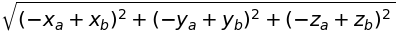

In [8]:
2*Dist[0]

La expresión anterior formará parte del vector de residuales empleado para el posicionamiento cooperativo.

## Coseno director asociado a la distancia entre receptores

Considerando que la posición de un receptor GPS es producto de dar solución a un sistema de ecuaciones algebraicas no lineales, que describen las distancias existentes entre el receptor y cada uno de los satelites visibles desde su ubicación y que es resuelto de forma iterativa con la ayuda de métodos numéricos. 

El algoritmo cooperativo toma en cuenta relaciones algebraicas adicionales, relacionadas con el conjunto de satélites visibles en común para una dupla de receptores GPS; de manera similar a como se conciben los planteamientos de posicionaiento diferencial. Las relaciones algebraicas adicionales, describen la ligadura asociada a la distancia existente entre el par de receptores que conforma una dupla cooperativa.

De forma que las variaciones en las coordenadas estimadas de un receptor, se veran reflejadas en la posición de su semejante a traves de la relación de distancia existente entre sí y su respectivo coseno director, definido de la siguiente manera:

In [9]:
Matrix([2*Ad[0], 2*Ad[1], 2*Ad[2]])

⎡                   -xₐ + x_b                   ⎤
⎢───────────────────────────────────────────────⎥
⎢   ____________________________________________⎥
⎢  ╱            2              2              2 ⎥
⎢╲╱  (-xₐ + x_b)  + (-yₐ + y_b)  + (-zₐ + z_b)  ⎥
⎢                                               ⎥
⎢                   -yₐ + y_b                   ⎥
⎢───────────────────────────────────────────────⎥
⎢   ____________________________________________⎥
⎢  ╱            2              2              2 ⎥
⎢╲╱  (-xₐ + x_b)  + (-yₐ + y_b)  + (-zₐ + z_b)  ⎥
⎢                                               ⎥
⎢                   -zₐ + z_b                   ⎥
⎢───────────────────────────────────────────────⎥
⎢   ____________________________________________⎥
⎢  ╱            2              2              2 ⎥
⎣╲╱  (-xₐ + x_b)  + (-yₐ + y_b)  + (-zₐ + z_b)  ⎦

Esta expresión formará parte de la matrix de cosenos directores construida para llevar a cabo posicionamiento cooperativo. 

## Modelo de pseudorango

El modelo de pseudo-distancia asumido para una pareja de receptores $a$ y $b$ que trabajan de manera cooperativa para posicionarse, es concebido como la agrupación de sus modelos de pseudo-distancia definidos para el ámbito autónomo.

In [10]:
Paa = Matrix(n_sats, 1, lambda i,j:var('P_{%s}^{(%d)}' % ('a', i+1)))
Pab = Matrix(n_sats, 1, lambda i,j:var('P_{%s}^{(%d)}' % ('b', i+1)))

rho_a = Matrix(n_sats, 1, lambda i,j:var('\hat{\\rho_{%s}^{(%d)}}' % ('a', i+1)))
rho_b = Matrix(n_sats, 1, lambda i,j:var('\hat{\\rho_{%s}^{(%d)}}' % ('b', i+1)))

Eq(Paa, Pa)

                 ⎡                        ____________________________________
                 ⎢                       ╱               2                 2  
                 ⎢-\tau__{1} + \tauₐ + ╲╱  (-x__{1} + xₐ)  + (-y__{1} + yₐ)  +
                 ⎢                                                            
⎡P_{a}__{(1)}⎤   ⎢                        ____________________________________
⎢            ⎥   ⎢                       ╱               2                 2  
⎢P_{a}__{(2)}⎥   ⎢-\tau__{2} + \tauₐ + ╲╱  (-x__{2} + xₐ)  + (-y__{2} + yₐ)  +
⎢            ⎥ = ⎢                                                            
⎢P_{a}__{(3)}⎥   ⎢                        ____________________________________
⎢            ⎥   ⎢                       ╱               2                 2  
⎣P_{a}__{(4)}⎦   ⎢-\tau__{3} + \tauₐ + ╲╱  (-x__{3} + xₐ)  + (-y__{3} + yₐ)  +
                 ⎢                                                            
                 ⎢                        __________

In [11]:
Eq(Pab, Pb)

                 ⎡                         ___________________________________
                 ⎢                        ╱                2                  
                 ⎢-\tau__{1} + \tau_b + ╲╱  (-x__{1} + x_b)  + (-y__{1} + y_b)
                 ⎢                                                            
⎡P_{b}__{(1)}⎤   ⎢                         ___________________________________
⎢            ⎥   ⎢                        ╱                2                  
⎢P_{b}__{(2)}⎥   ⎢-\tau__{2} + \tau_b + ╲╱  (-x__{2} + x_b)  + (-y__{2} + y_b)
⎢            ⎥ = ⎢                                                            
⎢P_{b}__{(3)}⎥   ⎢                         ___________________________________
⎢            ⎥   ⎢                        ╱                2                  
⎣P_{b}__{(4)}⎦   ⎢-\tau__{3} + \tau_b + ╲╱  (-x__{3} + x_b)  + (-y__{3} + y_b)
                 ⎢                                                            
                 ⎢                         _________

## El vector de residuales

De manera análoga al planteamiento del posicionamiento autónomo, el vector de residuales$\Delta P$ contempla la agrupación de los vectores de residuales autónomos para cada uno de los receptores que conforman una dupla de receptores trabajando en ámbito cooperativo. (ej: receptores a y b, son una dupla cooperativa). 

In [12]:
PD  = Matrix(MatrixSymbol("P",n, 1))
Pda = Matrix(n_sats, 1, lambda i,j:var('\Delta P_{%s}^{(%d)}' % ('a', i+1)))
Pdb = Matrix(n_sats, 1, lambda i,j:var('\Delta P_{%s}^{(%d)}' % ('b', i+1)))
Pdd = Matrix(1, 1, lambda i,j:var('\Delta d_{%s%s}' % ('a', 'b')))

PD[:n_sats, :]   = Pda
PD[n_sats:-1, :] = Pdb
PD[-1] = Pdd

rho_a = Matrix(n_sats, 1, lambda i,j:var('\hat{\\rho_{%s}^{(%d)}}' % ('a', i+1)))
rho_b = Matrix(n_sats, 1, lambda i,j:var('\hat{\\rho_{%s}^{(%d)}}' % ('b', i+1)))

rho = Matrix(MatrixSymbol("P_comp",n, 1))
rho[:n_sats, :]   = rho_a
rho[n_sats:-1, :] = rho_b
rho[-1] = Matrix(1, 1, lambda i,j:var(' \hat{d_{%s%s}}' % ('a', 'b')))


Pm = Matrix(MatrixSymbol("P_mod",n, 1))
Pm[:n_sats, :]   = Ps[:n_sats, :] - Pc_a
Pm[n_sats:-1, :] = Ps[n_sats:-1, :] - Pc_b
Pm[-1]           = Psd[-1, :] - 2*Dist

Asym = A
bsym = Ps - rho

In [13]:
Eq(Pda, Pm[:n_sats, :])

                           ⎡                                      ____________
                           ⎢                                     ╱            
                           ⎢P_{a}__{(1)} + \tau__{1} - \tauₐ - ╲╱  (-x__{1} + 
                           ⎢                                                  
⎡(\Delta, P_{a}__{(1)})⎤   ⎢                                      ____________
⎢                      ⎥   ⎢                                     ╱            
⎢(\Delta, P_{a}__{(2)})⎥   ⎢P_{a}__{(2)} + \tau__{2} - \tauₐ - ╲╱  (-x__{2} + 
⎢                      ⎥ = ⎢                                                  
⎢(\Delta, P_{a}__{(3)})⎥   ⎢                                      ____________
⎢                      ⎥   ⎢                                     ╱            
⎣(\Delta, P_{a}__{(4)})⎦   ⎢P_{a}__{(3)} + \tau__{3} - \tauₐ - ╲╱  (-x__{3} + 
                           ⎢                                                  
                           ⎢                        

In [14]:
Eq(Pdb, Pm[n_sats:-1, :])

                           ⎡                                       ___________
                           ⎢                                      ╱           
                           ⎢P_{b}__{(1)} + \tau__{1} - \tau_b - ╲╱  (-x__{1} +
                           ⎢                                                  
⎡(\Delta, P_{b}__{(1)})⎤   ⎢                                       ___________
⎢                      ⎥   ⎢                                      ╱           
⎢(\Delta, P_{b}__{(2)})⎥   ⎢P_{b}__{(2)} + \tau__{2} - \tau_b - ╲╱  (-x__{2} +
⎢                      ⎥ = ⎢                                                  
⎢(\Delta, P_{b}__{(3)})⎥   ⎢                                       ___________
⎢                      ⎥   ⎢                                      ╱           
⎣(\Delta, P_{b}__{(4)})⎦   ⎢P_{b}__{(3)} + \tau__{3} - \tau_b - ╲╱  (-x__{3} +
                           ⎢                                                  
                           ⎢                        

Para el caso particular de posicionamiento cooperativo, se puede apreciar que:

In [15]:
Eq(PD, bsym)#, Pm

⎡(\Delta, P_{a}__{(1)})⎤   ⎡P_{a}__{(1)} - \hat{\rho_{a}__{(1)}}⎤
⎢                      ⎥   ⎢                                    ⎥
⎢(\Delta, P_{a}__{(2)})⎥   ⎢P_{a}__{(2)} - \hat{\rho_{a}__{(2)}}⎥
⎢                      ⎥   ⎢                                    ⎥
⎢(\Delta, P_{a}__{(3)})⎥   ⎢P_{a}__{(3)} - \hat{\rho_{a}__{(3)}}⎥
⎢                      ⎥   ⎢                                    ⎥
⎢(\Delta, P_{a}__{(4)})⎥   ⎢P_{a}__{(4)} - \hat{\rho_{a}__{(4)}}⎥
⎢                      ⎥   ⎢                                    ⎥
⎢(\Delta, P_{b}__{(1)})⎥ = ⎢P_{b}__{(1)} - \hat{\rho_{b}__{(1)}}⎥
⎢                      ⎥   ⎢                                    ⎥
⎢(\Delta, P_{b}__{(2)})⎥   ⎢P_{b}__{(2)} - \hat{\rho_{b}__{(2)}}⎥
⎢                      ⎥   ⎢                                    ⎥
⎢(\Delta, P_{b}__{(3)})⎥   ⎢P_{b}__{(3)} - \hat{\rho_{b}__{(3)}}⎥
⎢                      ⎥   ⎢                                    ⎥
⎢(\Delta, P_{b}__{(4)})⎥   ⎢P_{b}__{(4)} - \hat{\rho_{b}__{(4)}}⎥
⎢         

Adicionalmente, el término asociado con el coseno director de la distancia entre los receptores que conforman una dupla cooperativa, forma parte del vector de residuales. Por ello por cada dupla de receptores que se conforma en el ámbito cooperativo, el vector de residuales tendrá una fila adicional en la cual se establece la diferencia entre el observable de distancia y su respectivo modelo algebraico.

## Contruyendo matriz de posicionamiento cooperativo

Con el propósito de establecer una relación de distancia entre receptores y sus cosenos directores al conjunto de satélites visibles, se considera un par de receptores GPS observa un conjunto de satélites en común, el cúal define un sistema de ecuaciones que tendrá soluciones siempre y cuando, el número de satélites visibles en común sea $n_{sats} >= 4$, siendo posible determinar las variables ($x_a, y_a, z_a, \tau_a$) y ($x_b, y_b, z_b, \tau_b$) de manera simultanea.\newline

Por ello, al considerar la construcción de la matriz de cosenos directores en el ámbito cooperativo entre una pareja de receptores, se agrupan las matrices de cosenos directores individuales. Para facil representación y ejemplificación, se tomará un par de receptores $a$ y $b$. \newline

Donde $a$ será el receptor "principal", el cúal se ha de suplir de las mediciones de los demás receptores GPS "remotos", para mejorar su precisión. \newline

En el caso de contar con una pareja de receptores ($a$ receptor principal y $b$ receptor remoto), las matrices de cosenos directores estarán definidas como:

In [16]:
# https://tex.stackexchange.com/questions/161299/squares-in-matrix
def get_matrix_cosdir(rx_id = "a", n=4, m=4):

    simbolics = "x_%s y_%s z_%s \\tau_%s c"%(rx_id, rx_id, rx_id, rx_id)
    x,y,z,t,c = symbols(simbolics)
    X       = Matrix(m, 1, [x,y,z,t])
    A       = Matrix(n, X.shape[0], lambda i,j :var('\hat{A_{%s}^{(%s)}}' % (X[j], i)))
    #print type(A)
    A[:,3] = [1]*n #np.ones(4)
    #print type(A)
    if n>4:
        A[4:, 3:] = [0]*(n-4)

    return A, X

Aa, Xa = get_matrix_cosdir(rx_id="a")
Ab, Xb = get_matrix_cosdir(rx_id="b", n=5, m=4)
Am, Xm = get_matrix_cosdir(rx_id="m", n=5, m=4)

# coseno director distancia
X = Matrix(4,1,symbols("x y z \\tau"))
Ad = Matrix(n_sats, 1, lambda i,j:var('\hat{d_{%s}^{(%s)}}' % ('ab', X[i]))).T
Ad[3] = 0
Ab[-1, :3] = Ad[-1, :3]

Am, Xm = get_matrix_cosdir(rx_id="m", n=5, m=4)
Adm = Matrix(n_sats, 1, lambda i,j:var('\hat{d_{%s}^{(%s)}}' % ('am', X[i]))).T
Adm[3] = 0
Am[-1, :3] = Adm[-1, :3]

Aa, Ab, #Am, Ad

⎛                                                                       ⎡\hat{
⎜⎡\hat{A_{x_a}__{(0)}}  \hat{A_{y_a}__{(0)}}  \hat{A_{z_a}__{(0)}}  1⎤  ⎢     
⎜⎢                                                                   ⎥  ⎢\hat{
⎜⎢\hat{A_{x_a}__{(1)}}  \hat{A_{y_a}__{(1)}}  \hat{A_{z_a}__{(1)}}  1⎥  ⎢     
⎜⎢                                                                   ⎥, ⎢\hat{
⎜⎢\hat{A_{x_a}__{(2)}}  \hat{A_{y_a}__{(2)}}  \hat{A_{z_a}__{(2)}}  1⎥  ⎢     
⎜⎢                                                                   ⎥  ⎢\hat{
⎜⎣\hat{A_{x_a}__{(3)}}  \hat{A_{y_a}__{(3)}}  \hat{A_{z_a}__{(3)}}  1⎦  ⎢     
⎝                                                                       ⎣\hat{

A_{x_b}__{(0)}}  \hat{A_{y_b}__{(0)}}  \hat{A_{z_b}__{(0)}}  1⎤⎞
                                                              ⎥⎟
A_{x_b}__{(1)}}  \hat{A_{y_b}__{(1)}}  \hat{A_{z_b}__{(1)}}  1⎥⎟
                                                              ⎥⎟
A_{x_b}__{(2)}}  \hat{A_{y_b

Donde al receptor remoto $b$ se le adiciona una fila que contiene la relación de cosenos directores de la distancia existente entre él y el receptor principal $a$. \newline 

De manera pues que el número de filas de las matrices de cosenos directores para los receptores remotos tendrán siempre una fila adicional, con lo cúal el número de filas de la matriz de cosenos directores cooperativa vendrá definido por producto entre el número de satélites visibles y número de receptores involucrados ($m+1$)(receptor principal + $m$ receptores remotos), más $m$ filas adicionales, asociadas a los cosenos directores de la distancia entre cada uno de los receptores remotos y el principal.\newline

En cuanto al número de columnas de la matriz de cosenos cooperativa, esta será multiplo de cuatro (número de variables x, y, z, $\tau$) y el número de receptores en interacción para el cálculo de posicionamiento cooperativo.\newline

Así un ejemplo de una matriz de cosenos cooperativa, para el caso de $m$ receptores en interacción ($m=3$), sería: 

In [17]:
from sympy.matrices import diag, Matrix, ones
Matrix(diag(Aa, Ab, Am))

⎡\hat{A_{x_a}__{(0)}}  \hat{A_{y_a}__{(0)}}  \hat{A_{z_a}__{(0)}}  1          
⎢                                                                             
⎢\hat{A_{x_a}__{(1)}}  \hat{A_{y_a}__{(1)}}  \hat{A_{z_a}__{(1)}}  1          
⎢                                                                             
⎢\hat{A_{x_a}__{(2)}}  \hat{A_{y_a}__{(2)}}  \hat{A_{z_a}__{(2)}}  1          
⎢                                                                             
⎢\hat{A_{x_a}__{(3)}}  \hat{A_{y_a}__{(3)}}  \hat{A_{z_a}__{(3)}}  1          
⎢                                                                             
⎢         0                     0                     0            0  \hat{A_{
⎢                                                                             
⎢         0                     0                     0            0  \hat{A_{
⎢                                                                             
⎢         0                     0                   

Donde las 3 matríces sobre la diagonal corresponde a las matrices de cosenos en posicionamiento autónomo de cada uno de los receptores en cuestión. Considerando que a los receptores remotos se les agrega una fila adicional para tomar en consideración el efecto del coseno director de la distacia desde cada receptor remoto hacia el receptor principal.

In [18]:
AA, _, _ = create_matrix_x_receiver("a", n_sats=n_sats)
Aa[:4,:] = AA
Matrix(Aa)

⎡                      -x__{1} + xₐ                                           
⎢────────────────────────────────────────────────────────  ───────────────────
⎢   _____________________________________________________     ________________
⎢  ╱               2                 2                 2     ╱               2
⎢╲╱  (-x__{1} + xₐ)  + (-y__{1} + yₐ)  + (-z__{1} + zₐ)    ╲╱  (-x__{1} + xₐ) 
⎢                                                                             
⎢                      -x__{2} + xₐ                                           
⎢────────────────────────────────────────────────────────  ───────────────────
⎢   _____________________________________________________     ________________
⎢  ╱               2                 2                 2     ╱               2
⎢╲╱  (-x__{2} + xₐ)  + (-y__{2} + yₐ)  + (-z__{2} + zₐ)    ╲╱  (-x__{2} + xₐ) 
⎢                                                                             
⎢                      -x__{3} + xₐ                 

In [19]:
Ab2, _, _ = create_matrix_x_receiver("b", n_sats=n_sats)
Ab[:4,:] = Ab2
Matrix(Ab)

⎡                       -x__{1} + x_b                                         
⎢───────────────────────────────────────────────────────────  ────────────────
⎢   ________________________________________________________     _____________
⎢  ╱                2                  2                  2     ╱             
⎢╲╱  (-x__{1} + x_b)  + (-y__{1} + y_b)  + (-z__{1} + z_b)    ╲╱  (-x__{1} + x
⎢                                                                             
⎢                       -x__{2} + x_b                                         
⎢───────────────────────────────────────────────────────────  ────────────────
⎢   ________________________________________________________     _____________
⎢  ╱                2                  2                  2     ╱             
⎢╲╱  (-x__{2} + x_b)  + (-y__{2} + y_b)  + (-z__{2} + z_b)    ╲╱  (-x__{2} + x
⎢                                                                             
⎢                       -x__{3} + x_b               

In [20]:
Am2, _, _ = create_matrix_x_receiver("m", n_sats=n_sats)
Am[:4,:] = Am2
Matrix(Am)

⎡                       -x__{1} + x_m                                         
⎢───────────────────────────────────────────────────────────  ────────────────
⎢   ________________________________________________________     _____________
⎢  ╱                2                  2                  2     ╱             
⎢╲╱  (-x__{1} + x_m)  + (-y__{1} + y_m)  + (-z__{1} + z_m)    ╲╱  (-x__{1} + x
⎢                                                                             
⎢                       -x__{2} + x_m                                         
⎢───────────────────────────────────────────────────────────  ────────────────
⎢   ________________________________________________________     _____________
⎢  ╱                2                  2                  2     ╱             
⎢╲╱  (-x__{2} + x_m)  + (-y__{2} + y_m)  + (-z__{2} + z_m)    ╲╱  (-x__{2} + x
⎢                                                                             
⎢                       -x__{3} + x_m               

Cabe recordar que la distancia euclidiana entre las coordenadas ecef (XYZ) entre dos receptores no involucra variables en el dominio del tiempo, por lo tanto, la fila adicional no tendrá derivada parcial con respecto a la desciación de reloj en tiempo GPS.


# Resumen de Capítulo

El método de mínimos cuadrados para ámbito cooperativo, toma como base los planteamientos para posicionamiento autónomo y posicionamiento diferencial entre una dupla de receptores. \newline

Para el ámbito cooperativo se hace referencia a un receptor principal, como aquel receptor GPS o GNSS que emplea las observaciones de satélites en común obtenidas por otros receptores remotos a su alrededor para mejorar sus precisión en posicionamiento.\newline

## El número de satélites visibles
De forma que el número de satélites visibles en común puede ser inferior al visto de manera independiente por cada receptor, así pues, para los receptores que conforman una dupla trabajando en ámbito cooperativo y que busque mejorar su precisión en posicionamiento, requere de mínimo 4 satélites visibles en común para obtener soluciones a los parametros $x, y, z, \tau$, ya que la distancia entre duplas $d$ es función de las coordenadas de los receptores, por lo tanto no es considerada una variable adicional a resolver en el problema númerico. 

## Las caracteristicas de la matriz de posicionamiento cooperativo

### la matrix es simetríca?? indenpotente 
El método cooperativo concedido para el desarrollo de este trabajo, se construye a partir de la agrupación de los vectores de residuales y matrices de cosenos directores de cada uno de los receptores que conforman una dupla cooperativa, de forma que, los elementos que conforman la diagonal de la matriz de posicionamiento cooperativo son las matrices de cosenos directores de cada uno de los receptores en interacción. 

### Las dimensiones de la matriz cooperativa
Las filas y columnas de la matriz de posicionamiento cooperativo son múltiplos del número de receptores en interacción. Adicionalmente, el número de filas incrementará en una unidad a medida que se adicionen receptores conjunto de receptores cooperativos, ya que por cada dupla que se conforma existe un coseno director de la distancia entre cada receptor remoto y el receptor principal.

### Las correlaciones y autocorrelaciones
Para efectos del planteamiento de este estudio, no se han considerado correlaciones ni correlaciónes entre receptores u observables de posicionamiento obtenidos por los receptores. Por tal razón, gran parte de los elementos en las diagonales superiores e inferiores de la matriz de posicionamiento cooperativo son asumidos como ceros. 

\chapter{Desarrollo experimental}

En este capítulo se presentan los distintos escenarios sobre los cuales se evaluará el posicionamiento cooperativo en pro de determinar si este contribuye a mejorar la precisión en posicionamiento de receptores de una frecuencia (single-frequency GPS receivers). \newline

En dichos escenarios se plantearan varaciones para modelar y corregir el retraso ionosférico; además de simular el comportamiento e impacto del ruido en la medición de la variable de control (distancia) definida para el ámbito cooperativo, con el propósito de evaluar el nivel de impacto de este fenomeno sobre el nivel de precisión en posicionamiento.\newline

Para determinar en que escenarios el posicionamiento cooperativo permite mejorar la precisión en posicionamiento de un receptor GPS con respecto al posicionamiento autónomo, se hace necesario definir un conjunto de métricas mediante las cuales validar la relación de error entre un modo de posicionamiento u otro. 


# Definición de las métricas

Para determinar el error promedio de los receptores móviles operando en modo cooperativo y su nivel de mejora en la precisión de posicionamiento con respecto a su solución de posicionamiento autónomo, se ha definido una métrica, en la cúal se obtiene la diferencia entre entre los errores de posicionamiento en modo autónomo ${E}_{stand}$ y modo cooperativo ${E}_{coop}$ a partir de $n$ observaciones durante un día GPS.\newline

Antes de presentar la definición de la métrica es importante aclarar que:

* se denomina "agrupación de receptores", a un conjunto de receptores que pueden ver satélites en común; los cuales son empleados para llevar a cabo tareas de posicionamiento en ámbito cooperativo.
* que la metríca "error promedio cooperativo ($\hat{\Delta{E}}_{coop}^{stan}$) ", es obtenida de promediar la diferencia entre los errores de posicionamiento autónomo ${E}_{stand}$ y cooperativo ${E}_{coop}$ de un receptor GPS, durante un periodo de tiempo. (ej: $n$ observaciones en un día GPS))
* el "indice de mejora ${I}_{pos}$", hace referencia a que tanto mejora la precisión en posicionamiento para un receptor GPS cuando trabaja en ámbito cooperativo con respecto a su precisión en modo autónomo .


## El error promedio cooperativo 

El cálculo del promedio de la diferencia entre el error de posicionamiento en ámbito cooperativo y autónomo considerando $n$ observaciones GPS; se denomina $\hat{\Delta{E}}_{coop}^{stan}$ y cuyo valor es obtenido según:

\begin{equation}
    {\hat{\Delta{E}}_{coop}^{stan}} = \frac{\sum_{i=1}^{n} {({E(i)}_{coop}} - {E(i)}_{stand})}{n}
\end{equation}

## El índice de mejora

Una vez se obtiene el valor $\hat{\Delta{E}}_{coop}^{stan}$ para cada uno de los receptores que conforman una agrupación de $m$ receptores cooperativos, se obtiene el promedio $\bar{\Delta{E}}_{coop}^{stan}$; de forma que se puede estimar un indice que refleja la mejora en la precisión de posicionamiento (${I}_{pos}$), que puede obtener un receptor GPS al trabajar en ámbito cooperativo.\newline

El valor de (${I}_{pos}$) ahora conocido como indice de mejora es cálculado a partir de:

\begin{equation}
    {I}_{pos} = \frac{\sum_{j=1}^{m} ({\hat{\Delta{E(j)}}_{coop}^{stan}} - \bar{\Delta{E(j)}}_{coop}^{stand})}{m}
\end{equation}

de manera que si el valor de $({I}_{pos}>0)$ es positivo indicará que el error de posicionamiento en modo autónomo es mayor comparado con el obtenido en ámbito cooperativo, de forma que se para las condiciones donde esto se cumple; se da validación a la hipotesis planteada en la presente investigación.\newline

Para los casos desfavorables a la hipotesis, se consideran las condiciones y escenarios bajo los cuales el indice $({I}_{pos}<0)$ es negativo

## La desviación estandar del índice de mejora
El valor que acompaña a la diferencia promedio, es la desviación estandar de la diferencia entre los dos modos de posicionamiento, el cual ha sido obtenido así:

\begin{equation}
    {\sigma I}_{pos} = \sqrt{\frac{\sum_{j=1}^{m} ({\hat{\Delta{E(j)}}_{coop}^{stan}} - \bar{\Delta{E(j)}}_{coop}^{stand})}{m-1}}
\end{equation}

El indice de mejora y su desviación estandar serán los resultados obtenidos para cada escenario de simulación en los cuales se evaluarán varias de agrupaciones de receptores GPS. Así se determinará si el posicionamiento en ámbito cooperativo es favorable para la mejora de la precisión en las condiciones definidas para el respectivo escenario de simulación.

# Los escenarios de simulación

El diseño experimental contempla el uso de observables de una frecuencia para receptores GPS, en los cuales adicionalmente la variable de control $d$ entre cada pareja de receptores es un observable al que se le puede atribuir nivel de ruido en su medición. \newline

Adicionalmente, el efecto de la dispersión ionosférica sobre el valor del observable de pseudo-distancia (pseudorango), puede ser mitigado con la selección de un modelo ionosférico el cual permite al algoritmo que calcula la posición del receptor compensar el efecto del retraso ionosférico para así aumentar su nivel de precisión en posicionamiento.\newline

Por ello, se han definido un conjunto de cuatro escenarios en los cuales se contempla la variación del modelo ionosférico y el nivel de error en el observable $d$ (variable de control). \newline

Así los escenarios definidos para el estudio quedan definidos como:

In [ ]:
%cat ../0_Diseno_experimental.txt

Los conjuntos de estaciones empleados para evaluar cada uno de los escenarios anteriores será:

In [ ]:
%matplotlib inline

%run -i ../code/multirover4.py

dia1 = "010"
dian = "010"
ano = "2017"

Observable = "C1"
# Variables de la grafica
error_max = 100

# Ubicacion de la Rinex local DB 
Rinex_dataBase      = "../../new_data"
Simu_Folder         = getcwd() +"/" + "Temp_Simul_data"

# agregando nuevos pares de estaciones (que no estan en el kmz)
#parejas_kmz        = get_data_stations("./Coconet_sites_2016.kmz", 1e3)
#parejas_kmz        = get_data_stations("./UNAVCO_perm.kmz", 300) # 110
parejas_kmz = {}

parejas_kmz[0] = ("OLVN", "AIRS", "NWBL",)
parejas_kmz[1] = ("BARA", "TGDR", "JME2",)
parejas_kmz[2] = ("ljrn", "p553", "p554", "fzhs",)
parejas_kmz[3] = ("CN20", "TGPM",)
parejas_kmz[4] = ('TGMX', 'UNPM',)


RinexDB = descarga_Rinex_Compri(Rinex_dataBase, parejas_kmz, dia1, dian, ano)
## Leer los rinex almacenado en mi equipo
RinexDB = read_Rinex_Compri(Rinex_dataBase, parejas_kmz)

#pareja = parejas_kmz[3]
resolucion = 200
tsample_sample = 15

show_plots_inline = True # For development
#show_plots_inline = False # For generate reports
plot_in_doc = True

axis_labels = ["gps_sow ["+str(resolucion*tsample_sample)+" s]", "error [m]", "stdlone_err vs coop_err"]

df_res = pd.DataFrame()
Resul_final, Scheme_tags = [], []

In [1]:
df_stations = pd.DataFrame(parejas_kmz.items(), index=parejas_kmz.keys(), columns=["Group", "Receivers"])
df_stations = df_stations.set_index("Group")
df_stations = df_stations.assign(Size_group = df_stations['Receivers'].apply(lambda x: len(x)))
df_stations = df_stations.assign(Location = ["Monserrat (Antillas Caribeñas)","Rep. Dominicana", "USA", "Panáma", "México"]) #Antillas"

#df_stations

Tabla = df_stations.to_latex().encode('ascii','ignore')
label = "tabla_escenarios"
caption = "Estaciones utilizadas para el estudio."

Table_latex(table=Tabla, ref=label, cap=caption)

NameError: name 'pd' is not defined

En la siguiente figura se puede apreciar una visión geográfica de donde se encuentran las agrupaciones utilizadas.

In [ ]:
from IPython.display import Image
#Image(filename="../Documento/images/Red_Analisis.png")
#display(Image(filename))

filename = "../Documento/images/Red_Analisis.png"
pdf_name = "Red_Analisis"
figlabel = pdf_name
figcaption = "Ubicación de las estaciones empleadas para el estudio."

import matplotlib.image as mpimg
img = mpimg.imread(filename)
plt.imshow(img, extent=[0,100,0,1], aspect='auto')
save(pdf_name, ext="pdf", close=True, verbose=True)
display(Image(filename),Caption(pdf_name, figlabel, str(figcaption), size=(1.05, 0.35)))

# Ejecución de los experimentos

## Escenario 1

In [ ]:
!sed -n '2,8 p' ../../0_Diseno_experimental.txt

In [ ]:
ion_mas= None
ion_rov= None
scenario = "1.1"

# incrustar titulo de seccion
display(Latex(section_title(0, scenario=scenario).encode("utf-8")))

In [ ]:
df_res = pd.DataFrame()
Resul_final, Scheme_tags = [], []

tit = []
R11, _ = simulation_multirover(Observable, error_max, parejas_kmz, RinexDB, dia1, dian, ano, 
                             distances=0.,
                             Simu_Folder=None,
                             res_plot=resolucion,
                             iono_model_master = ion_mas,
                             iono_model_rover  = ion_rov, 
                             silent_exec=False)

df_res, plots_mean_std_11 = gen_df_results(df_res, R11, scenario)

# BackUp Results
#df_res.T
Resul_final.append(R11)
Scheme_tags.append(scenario)

tit.append(scenario)
df11 = df_res.set_index("scenario").T

Tabla = df11[tit].to_latex().encode('ascii','ignore')
label = "tabla_"+scenario
caption = "\'Indice de mejora para escenario %s"%(scenario)

Table_latex(table=Tabla, ref=label, cap=caption)

In [ ]:
# See Figure~\ref{fig:q1_1}. The code that generated it is on page~\pageref{code:fig:q1_1}

# incrustar titulo de seccion
display(Latex(section_title(1, scenario=scenario).encode("utf-8")))

plot_from_dict(R11, axis_labels=axis_labels, scenario=scenario, 
               plot_inline=show_plots_inline,
               plot_in_doc=plot_in_doc)

plotting_df(plots_mean_std_11,
            title="mean diference stdlone - coop position: escenario ",
            scenario=scenario,
            xlabel="gps_sow", #  ["+str(resolucion)+"x30s]",
            ylabel="err_stdlone - err_coop [m]",
            plot_inline=show_plots_inline,
            plot_in_doc=plot_in_doc)


In [ ]:
scenario = "1.2"
# incrustar titulo de seccion
display(Latex(section_title(0, scenario=scenario).encode("utf-8")))

R12, _ = simulation_multirover(Observable, error_max, parejas_kmz, RinexDB, dia1, dian, ano, 
                             distances=5,
                             Simu_Folder=None,
                             res_plot=resolucion,
                             iono_model_master = ion_mas,
                             iono_model_rover  = ion_rov, 
                             silent_exec=True)

df_res, plots_mean_std_12 = gen_df_results(df_res, R12, scenario)

In [ ]:
# incrustar titulo de seccion
display(Latex(section_title(1, scenario=scenario).encode("utf-8")))

plot_from_dict(R12, axis_labels=axis_labels, scenario=scenario,
               plot_inline=show_plots_inline,
               plot_in_doc=plot_in_doc)

plotting_df(plots_mean_std_12, 
            title="mean diference stdlone - coop position: escenario ",
            scenario=scenario,
            xlabel="gps_sow", #  ["+str(resolucion)+"x30s]",
            ylabel="err_stdlone - err_coop [m]",
            plot_inline=show_plots_inline,
            plot_in_doc=plot_in_doc)

# BackUp Results
#df_res.T
Resul_final.append(R12)
Scheme_tags.append(scenario)

tit.append(scenario)
df12 = df_res.set_index("scenario").T

Tabla = df12[tit].to_latex().encode('ascii','ignore')
label = "tabla_"+scenario
caption = "\'Indice de mejora para escenario %s"%(scenario)

display(Table_latex(table=Tabla, ref=label, cap=caption))

In [ ]:
scenario = "1.3"

# incrustar titulo de seccion
display(Latex(section_title(0, scenario=scenario).encode("utf-8")))

R13, _ = simulation_multirover(Observable, error_max, parejas_kmz, RinexDB, dia1, dian, ano, 
                             distances=10,
                             Simu_Folder=None,
                             res_plot=resolucion,
                             iono_model_master = ion_mas,
                             iono_model_rover  = ion_rov, 
                             silent_exec=True)

df_res, plots_mean_std_13 = gen_df_results(df_res, R13, scenario)


In [ ]:
# incrustar titulo de seccion
display(Latex(section_title(1, scenario=scenario).encode("utf-8")))

plot_from_dict(R13, axis_labels=axis_labels, scenario=scenario,
               plot_inline=show_plots_inline,
               plot_in_doc=plot_in_doc)

plotting_df(plots_mean_std_13, 
            title="mean diference stdlone - coop position: escenario ",
            scenario=scenario,
            xlabel="gps_sow", #  ["+str(resolucion)+"x30s]",
            ylabel="err_stdlone - err_coop [m]",
            plot_inline=show_plots_inline,
            plot_in_doc=plot_in_doc)

# BackUp Results
#df_res.T
Resul_final.append(R13)
Scheme_tags.append(scenario)

tit.append(scenario)
df13 = df_res.set_index("scenario").T

Tabla = df13[tit].to_latex().encode('ascii','ignore')
label = "tabla_"+scenario
caption = "\'Indice de mejora para escenario %s"%(scenario)

display(Table_latex(table=Tabla, ref=label, cap=caption))

In [ ]:
#tit = "\subsection{Resumen de los resultados para el escenario 1}"
#display(Latex(section_title(tit, scenario="").encode("utf-8")))

#schemes   = ["1.1", "1.2", "1.3"]
#df1 = df_res.set_index("scenario").T
#df1 = df1[schemes].T

#Tabla = df1.to_latex().encode('ascii','ignore')
#label = "tabla_"+str('-'.join(schemes))
#caption = "\\'Indice de mejora para los escenarios %s"%(str('-'.join(schemes)))

#Table_latex(table=Tabla, ref=label, cap=caption)

In [ ]:
#schemes   = ["1.1", "1.2", "1.3"]
#df1 = df_res.set_index("scenario").T
#df1 = df1[schemes].T
#df1

# Escenario 2

In [ ]:
!sed -n '8,15 p' ../../0_Diseno_experimental.txt

In [ ]:
distances = [0., 5, 10]
schemes   = ["2.1", "2.2", "2.3"]
ion_mas= "dual_freq"
ion_rov= None

In [ ]:
tit = []
for d, scenario in zip(distances, schemes):
    
    # incrustar titulo de seccion
    display(Latex(section_title(0, scenario=scenario).encode("utf-8")))
    
    print "*"*35
    print "Start simulation for scheme ", scenario
    print "*"*35

    R21, _ = simulation_multirover(Observable, error_max, parejas_kmz, RinexDB, dia1, dian, ano, 
                                 distances = d,
                                 Simu_Folder=None,
                                 res_plot=resolucion,
                                 iono_model_master= ion_mas,
                                 iono_model_rover = ion_rov,
                                 silent_exec=True)
    
    
    df_res, plots_mean_std_21 = gen_df_results(df_res, R21, scenario)
    
    tit.append(scenario)
    df2 = df_res.set_index("scenario").T

    Tabla = df2[tit].to_latex().encode('ascii','ignore')
    label = "tabla_"+scenario
    caption = "\'Indice de mejora para escenario %s"%(scenario)

    display(Table_latex(table=Tabla, ref=label, cap=caption))
    
    # incrustar titulo de seccion
    display(Latex(section_title(1, scenario=scenario).encode("utf-8")))
    
    plot_from_dict(R21, axis_labels=axis_labels, scenario=scenario,
                   plot_inline=show_plots_inline,
                   plot_in_doc=plot_in_doc)
    
    plotting_df(plots_mean_std_21,
                title="mean diference stdlone - coop position: escenario ",
                scenario=scenario,
                xlabel="gps_sow", #  ["+str(resolucion)+"x30s]",
                ylabel="err_stdlone - err_coop [m]",
                plot_inline=show_plots_inline,
                plot_in_doc=plot_in_doc)
    
    # BackUp Results
    #df_res.T
    Resul_final.append(R21)
    Scheme_tags.append(scenario)

"""
df2 = df_res.set_index("scenario").T
df2 = df2[schemes].T

Tabla = df2.to_latex().encode('ascii','ignore')
label = "tabla_"+str('-'.join(schemes))
caption = "\'Indice de mejora para los escenarios %s"%(str('-'.join(schemes)))

Table_latex(table=Tabla, ref=label, cap=caption)
"""

# Escenario 3

In [ ]:
!sed -n '15,24 p' ../../0_Diseno_experimental.txt

In [ ]:
distances = [0., 5, 10]
schemes   = ["3.1", "3.2", "3.3"]
ion_mas= "dual_freq"
ion_rov= "klobu"

In [1]:
tit = []
for d, scenario in zip(distances, schemes):
    
    # incrustar titulo de seccion
    display(Latex(section_title(0, scenario=scenario).encode("utf-8")))
    
    print "*"*35
    print "Start simulation for scheme ", scenario
    print "*"*35

    R31, _  = simulation_multirover(Observable, error_max, parejas_kmz, RinexDB, dia1, dian, ano, 
                                 distances = d,
                                 Simu_Folder=None,
                                 res_plot=resolucion,
                                 iono_model_master= ion_mas,
                                 iono_model_rover = ion_rov,
                                 silent_exec=True)
    df_res, plots_mean_std_31 = gen_df_results(df_res, R31, scenario)
    
    tit.append(scenario)
    df3 = df_res.set_index("scenario").T

    Tabla = df3[tit].to_latex().encode('ascii','ignore')
    label = "tabla_"+scenario
    caption = "\'Indice de mejora para escenario %s"%(scenario)

    display(Table_latex(table=Tabla, ref=label, cap=caption))
    
    # incrustar titulo de seccion
    display(Latex(section_title(1, scenario=scenario).encode("utf-8")))

    plot_from_dict(R31, axis_labels=axis_labels, scenario=scenario,
                   plot_inline=show_plots_inline,
                   plot_in_doc=plot_in_doc)
    
    plotting_df(plots_mean_std_31,
                title="mean diference stdlone - coop position: escenario ",
                scenario=scenario,
                xlabel="gps_sow", #  ["+str(resolucion)+"x30s]",
                ylabel="err_stdlone - err_coop [m]",
                plot_inline=show_plots_inline,
                plot_in_doc=plot_in_doc)
    
    # BackUp Results
    df_res.T
    Resul_final.append(R31)
    Scheme_tags.append(scenario)
    
"""
df3 = df_res.set_index("scenario").T
df3 = df3[schemes].T

Tabla = df3.to_latex().encode('ascii','ignore')
label = "tabla_"+str('-'.join(schemes))
caption = "\'Indice de mejora para los escenarios %s"%(str('-'.join(schemes)))

Table_latex(table=Tabla, ref=label, cap=caption)
"""

NameError: name 'distances' is not defined

# Escenario 4

In [ ]:
!sed -n '24,29 p' ../../0_Diseno_experimental.txt

In [ ]:
distances = [0., 5, 10]
schemes   = ["4.1", "4.2", "4.3"]
ion_mas= "klobu"
ion_rov= "klobu"

In [ ]:
tit = []
for d, scenario in zip(distances, schemes):
    
    # incrustar titulo de seccion
    display(Latex(section_title(0, scenario=scenario).encode("utf-8")))
    
    print "*"*35
    print "Start simulation for scheme ", scenario
    print "*"*35

    R41, _ = simulation_multirover(Observable, error_max, parejas_kmz, RinexDB, dia1, dian, ano, 
                                 distances = d,
                                 Simu_Folder=None,
                                 res_plot=resolucion,
                                 iono_model_master= ion_mas,
                                 iono_model_rover = ion_rov,
                                 silent_exec=True)
    
    df_res, plots_mean_std_41 = gen_df_results(df_res, R41, scenario)

    tit.append(scenario)
    df4 = df_res.set_index("scenario").T

    Tabla = df4[tit].to_latex().encode('ascii','ignore')
    label = "tabla_"+scenario
    caption = "\'Indice de mejora para escenario %s"%(scenario)

    display(Table_latex(table=Tabla, ref=label, cap=caption))
    
    # incrustar titulo de seccion
    display(Latex(section_title(1, scenario=scenario).encode("utf-8")))

    plot_from_dict(R41, axis_labels=axis_labels, scenario=scenario,
                   plot_inline=show_plots_inline,
                   plot_in_doc=plot_in_doc)
    
    plotting_df(plots_mean_std_41,
                title="mean diference stdlone - coop position: escenario ",
                scenario=scenario,
                xlabel="gps_sow", #  ["+str(resolucion)+"x30s]",
                ylabel="err_stdlone - err_coop [m]",
                plot_inline=show_plots_inline,
                plot_in_doc=plot_in_doc)
    
    # BackUp Results
    df_res.T
    Resul_final.append(R41)
    Scheme_tags.append(scenario)
    
"""
df4 = df_res.set_index("scenario").T
df4 = df4[schemes].T

Tabla = df4.to_latex().encode('ascii','ignore')
label = "tabla_"+str('-'.join(schemes))
caption = "\'Indice de mejora para los escenarios %s"%(str('-'.join(schemes)))

Table_latex(table=Tabla, ref=label, cap=caption)
"""

# Escenario 5

In [ ]:
!sed -n '30,38 p' ../../0_Diseno_experimental.txt

In [ ]:
distances = [0., 5, 10]
schemes   = ["5.1", "5.2", "5.3"]
ion_mas= "dual_freq"
ion_rov= "wallas"

In [ ]:
tit = []
    
for d, scenario in zip(distances, schemes):
    
    # incrustar titulo de seccion
    display(Latex(section_title(0, scenario=scenario).encode("utf-8")))
    
    print "*"*35
    print "Start simulation for scheme ", scenario
    print "*"*35

    R51, _ = simulation_multirover(Observable, error_max, parejas_kmz, RinexDB, dia1, dian, ano, 
                                 distances = d,
                                 Simu_Folder=None,
                                 res_plot=resolucion,
                                 iono_model_master= ion_mas,
                                 iono_model_rover = ion_rov,
                                 silent_exec=True)
    
    df_res, plots_mean_std_51 = gen_df_results(df_res, R51, scenario)

    tit.append(scenario)
    df5 = df_res.set_index("scenario").T

    Tabla = df5[tit].to_latex().encode('ascii','ignore')
    label = "tabla_"+scenario
    caption = "\'Indice de mejora para escenario %s"%(scenario)

    display(Table_latex(table=Tabla, ref=label, cap=caption))

    # incrustar titulo de seccion
    display(Latex(section_title(1, scenario=scenario).encode("utf-8")))

    plot_from_dict(R51, axis_labels=axis_labels, scenario=scenario, plot_inline=show_plots_inline)
    plotting_df(plots_mean_std_51,
                title="mean diference stdlone - coop position: escenario ",
                scenario=scenario,
                xlabel="gps_sow", #  ["+str(resolucion)+"x30s]",
                ylabel="err_stdlone - err_coop [m]",
                plot_inline=show_plots_inline)
    
    # BackUp Results
    df_res.T
    Resul_final.append(R51)
    Scheme_tags.append(scenario)
    
"""
df5 = df_res.set_index("scenario").T
df5 = df5[schemes].T

Tabla = df5.to_latex().encode('ascii','ignore')
label = "tabla_"+str('-'.join(schemes))
caption = "\'Indice de mejora para los escenarios %s"%(str('-'.join(schemes)))

Table_latex(table=Tabla, ref=label, cap=caption)
"""

# Escenario 6

In [ ]:
!sed -n '39,44 p' ../../0_Diseno_experimental.txt

In [ ]:
distances = [0., 5, 10]
schemes   = ["6.1", "6.2", "6.3"]
ion_mas= "wallas"
ion_rov= "wallas"

In [ ]:
tit = []
for d, scenario in zip(distances, schemes):
    
    # incrustar titulo de seccion
    display(Latex(section_title(0, scenario=scenario).encode("utf-8")))
    
    print "*"*35
    print "Start simulation for scheme ", scenario
    print "*"*35

    R61, _ = simulation_multirover(Observable, error_max, parejas_kmz, RinexDB, dia1, dian, ano, 
                                 distances = d,
                                 Simu_Folder=None,
                                 res_plot=resolucion,
                                 iono_model_master= ion_mas,
                                 iono_model_rover = ion_rov,
                                 silent_exec=True)
    
    df_res, plots_mean_std_61 = gen_df_results(df_res, R61, scenario)

    tit.append(scenario)
    df6 = df_res.set_index("scenario").T

    Tabla = df6[tit].to_latex().encode('ascii','ignore')
    label = "tabla_"+scenario
    caption = "\'Indice de mejora para escenario %s"%(scenario)

    display(Table_latex(table=Tabla, ref=label, cap=caption))
       
    # incrustar titulo de seccion
    display(Latex(section_title(1, scenario=scenario).encode("utf-8")))

    plot_from_dict(R61, axis_labels=axis_labels, scenario=scenario, plot_inline=show_plots_inline)
    plotting_df(plots_mean_std_61,
                title="mean diference stdlone - coop position: escenario ",
                scenario=scenario,
                xlabel="gps_sow", #  ["+str(resolucion)+"x30s]",
                ylabel="err_stdlone - err_coop [m]",
                plot_inline=show_plots_inline)
    
    # BackUp Results
    df_res.T
    Resul_final.append(R61)
    Scheme_tags.append(scenario)
    
"""
df6 = df_res.set_index("scenario").T
df6 = df6[schemes].T

Tabla = df6.to_latex().encode('ascii','ignore')
label = "tabla_"+str('-'.join(schemes))
caption = "\'Indice de mejora para los escenarios %s"%(str('-'.join(schemes)))

Table_latex(table=Tabla, ref=label, cap=caption)
"""

In [ ]:
# GUARDANDO TODOS LOS DICCIONARIOS PARA EXPORTAR A EXCEL O ALGO
csv_content = pd.DataFrame([Resul_final], columns=Scheme_tags)
#csv_content

In [ ]:
# How to pickle or store Jupyter (IPython) notebook session for later
# https://goo.gl/ijgv2H
# conda install pytables

#import pandas as pd
backup = pd.HDFStore('backup.h5')
backup['Resul_final'] = csv_content
backup['df_res'] = df_res
backup.close()

In [ ]:
backup.close()

In [ ]:
tit = r"""\subsection{Resumen de los resultados para los escenarios}"""

display(Latex(section_title(tit, scenario="").encode("utf-8")))

"""
df_fin = df_res.set_index("scenario").T
    
Tabla = df_fin.to_latex().encode('ascii','ignore')
label = "tabla_resumen_escenarios"
caption = "Resultados para todos los escenarios."
Table_latex(Tabla, label, caption, landscape=True)
"""

In [4]:
%run -i ../code/multirover4.py

import pandas as pd
pd.set_option('display.precision',6)

backup = pd.HDFStore('backup.h5')
csv_content = backup['Resul_final']
Resul_final = csv_content.iloc[0].to_dict()
#R11 = Resul_final["1.1"]

distances = [0]*3
scenarios = [["%s.%s" %(item, subitem) 
              for subitem in range(1, len(distances)+1)] 
             for item in range(1, 7)]
print scenarios
dfin = pd.DataFrame()
for scheme in scenarios:
    for s in scheme:
        R = Resul_final[s]
        dfin = gen_df_results2(dfin, R, s)
        
dfin1 = dfin.pivot_table(index='scenario', columns='stations', values='mean_e')
Tabla = dfin1.to_latex().encode('ascii','ignore')
label = "tabla_resumen_escenarios"
caption = r"""\'Indice de mejora para todos los escenarios."""
display(Table_latex(Tabla, label, caption, landscape=False))


dfin2 = dfin.pivot_table(index='scenario', columns='stations', values='std_e')
Tabla = dfin2.to_latex().encode('ascii','ignore')
label = "tabla_resumen_escenarios"
caption = r"""Desviaci\'on estandar del \'Indice de mejora para todos los escenarios."""
display(Table_latex(Tabla, label, caption, landscape=False))

[['1.1', '1.2', '1.3'], ['2.1', '2.2', '2.3'], ['3.1', '3.2', '3.3'], ['4.1', '4.2', '4.3'], ['5.1', '5.2', '5.3'], ['6.1', '6.2', '6.3']]


<__main__.Table_latex instance at 0x7fbaca987638>

<__main__.Table_latex instance at 0x7fbaca92f488>